In [1]:
import numpy as np
import pandas as pd

# 前処理

    機械学習のアルゴリズムを適用する前にデータの特性を理解して前処理を行う
    データ解析の8割から9割をしめる重要な工程
    内容としては以下の3つ
    ・欠損値への対応
    ・カテゴリ変数のエンコーディング
    ・特徴量の正規化

欠損値

    対応方法
    ・欠損値を補完する
    ・欠損値を除去する

In [2]:
#サンプルのデータセット
df = pd.DataFrame({
    'A':[1,np.nan,3,4,5],
    'B':[6,7,8,np.nan,10],
    'C':[11,12,13,14,15]
})
df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [3]:
#isnull() 欠損値かどうかを確認する
df.isnull()

#欠損値を除去する場合はdropna()を使用する
#dropna() →行を削除
#dropna(axis = 1) →列を削除

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [4]:
#欠損値の補完
#方法1
#fillna()を使用

#方法2
#preprocessingのImputerを使用

from sklearn.preprocessing import Imputer
#平均値で欠損値を補完するインスタンスを作成する
imp = Imputer(strategy = "mean",axis = 0)
#欠損値を補完
imp.fit(df)
imp.transform(df) #返却値はnumpy

C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

カテゴリ変数のエンコード

In [5]:
df = pd.DataFrame({
    'A':[1,2,3,4,5],
    'B':['a','b','a','b','c']
})
df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


In [6]:
#方法1
#カテゴリ変数のエンコーディング

#方法2
#One-Hotエンコーディング


In [7]:
from sklearn.preprocessing import LabelEncoder
#ラベルエンコーダのインスタンス生成
le = LabelEncoder()
#ラベルのエンコーディング
le.fit(df["B"])
le.transform(df["B"])


array([0, 1, 0, 1, 2])

In [8]:
#元の値
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [9]:
#One-Hotエンコーディングの方法は2つ
#方法1
#scikit-learnを使用する場合はpreprocessingのOneHotEncoderクラスを使用

#方法2
#pandasを使用する場合はget_dummies関数を使用する


In [10]:
#OneHotEncoderを使用する場合
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#DataFrameコピー
df_ohe = df.copy()

#ラベルエンコーダのインスタンス化
le = LabelEncoder()

#英語のa,b,cを1,2,3に変換
df_ohe['B'] = le.fit_transform(df_ohe['B'])

#One-hotエンコーダのインスタンス化
ohe = OneHotEncoder(categorical_features=[1])
#One-Hotエンコーディング
ohe.fit_transform(df_ohe).toarray()

C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[1., 0., 0., 1.],
       [0., 1., 0., 2.],
       [1., 0., 0., 3.],
       [0., 1., 0., 4.],
       [0., 0., 1., 5.]])

特徴量の正規化

    特徴量の大きさを揃える処理
    ・分散正規化
    　特徴量の平均が0、標準偏差が1になるように変換する処理(標準化)
    ・最小最大正規化
    　特徴量の最小値が0、最大値が1になるように正規化する処理

In [11]:
df = pd.DataFrame({
    'A':[1,2,3,4,5],
    'B':[100,200,300,400,500]
})

df

,A,B
0,1,100
1,2,200
2,3,300
3,4,400
4,5,500


In [12]:
#分散正規化
from sklearn.preprocessing import StandardScaler
#分散正規化のインスタンス生成
stdsc = StandardScaler()

#分散正規化を実行
stdsc.fit(df)
stdsc.transform(df)

C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naohi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

In [13]:
from sklearn.preprocessing import MinMaxScaler
#最小最大正規化のインスタンス生成
mmsc = MinMaxScaler()
#最小最大正規化を実行
mmsc.fit(df)
mmsc.transform(df)

C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

分類

    データの「クラス」を予測して分ける
    紹介
    ・サポートベクタ
    ・決定木
    ・ランダムフォレスト

In [14]:
#学習データとテストデータの準備
from sklearn.datasets import load_iris

iris = load_iris()
X,y = iris.data,iris.target

print(X[:5,:])

print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


    学習データとテストデータを分けるためにmodel_selectionモジュールのtrain_test_split関数を利用する
    引数test_size→テストデータの割合
    引数random_stateにはシード値を指定
    

In [15]:
from sklearn.model_selection import train_test_split

#学習データとテストデータに分割
#テストデータのサイズ:3割、シード値:123
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(105, 4)
(45, 4)
(105,)
(45,)


サポートベクタマシン(SVM)

    分類・回帰だけでなく外れ値の検出にも使えるアルゴリズム
    直線や平面で分離できないデータを高次元の空間に写して線形分離をすることで分類を行う
    データ間の近さを定量化するカーネル(高次元の空間でのデータ間の内積を計算する関数に相当する)を導入

In [16]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

#X軸Y軸ともに0から1までの一様分布から100点をサンプリング
X0 = np.random.uniform(size=(100,2))

#クラス0のラベルを100個生成
y0 = np.repeat(0,100)

#X軸y軸ともに-1から0までの一様分布から100点をサンプリング
X1 = np.random.uniform(-1.0,0.0,size=(100,2))

#クラス1のラベルを100個生成
y1 = np.repeat(1,100)

#散布図にプロット
fig,ax = plt.subplots()

ax.scatter(X0[:,0],X0[:,1],marker="o",label="class 0")

ax.scatter(X1[:,0],X1[:,1],marker="x",label="class 1")

ax.set_xlabel("x")
ax.set_ylabel("y")

ax.legend()
plt.show()


<Figure size 640x480 with 1 Axes>

In [17]:
from sklearn.svm import SVC

#学習、および決定境界、マージン、サポートベクタを可視化する関数
def plot_boundary_margin_sv(X0,y0,X1,y1,kernel,C,xmin=-1,xmax=1,ymin=-1,ymax=1):
    #サポートベクタマシンのインスタンス化
    svc = SVC(kernel = kernel , C = C)
    
    #学習
    svc.fit(np.vstack((X0,X1)),np.hstack((y0,y1)))
    
    fig,ax = plt.subplots()
    ax.scatter(X0[:,0],X0[:,1],marker="o",label="class 0")
    
    ax.scatter(X1[:,0],X1[:,1],marker="x",label="class 1")
    
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p,
               colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])
    # サポートベクタをプロット
    ax.scatter(svc.support_vectors_[:, 0],
               svc.support_vectors_[:, 1],
               s=250, facecolors='none',
              edgecolors='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()

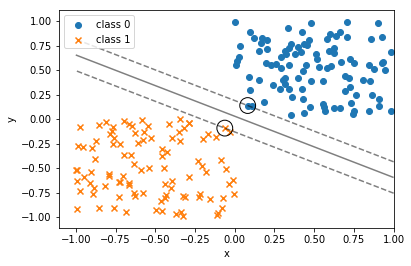

In [18]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='linear', C=1e6)

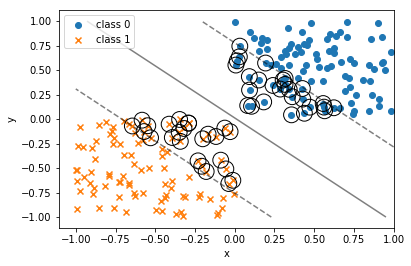

In [19]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='linear', C=0.1)

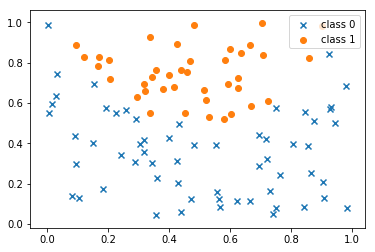

In [20]:
np.random.seed(123)

X = np.random.random(size=(100,2))
y = (X[:,1] > 2*(X[:,0]-0.5)**2+0.5).astype(int)

fig,ax = plt.subplots()
ax.scatter(X[y ==0,0],X[y==0,1],marker="x",label="class 0")

ax.scatter(X[y ==1,0],X[y==1,1],marker="o",label="class 1")
ax.legend()
plt.show()

C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


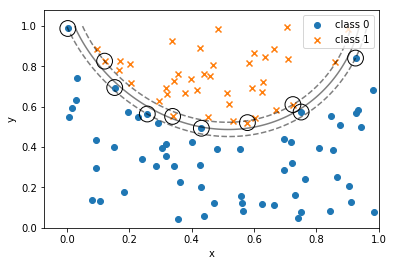

In [21]:
#決定境界、マージン、サポートベクタをプロット
X0,X1 = X[y==0,:],X[y==1,:]
y0,y1 = y[y==0],y[y==1]

plot_boundary_margin_sv(X0,y0,X1,y1,kernel="rbf",C=1e3,xmin=0,ymin=0)

    サポートベクタマシンは外れ値の影響を受けやすいため、正規化が必要

決定木

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#データセットの読み込み
iris = load_iris()
X,y = iris.data,iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

#決定木をインスタンス化
tree = DecisionTreeClassifier(max_depth=3)

#学習
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data= export_graphviz(tree, filled=True,
                rounded=True,
                class_names=['Setosa',
                     'Versicolor',
                     'Virigica'],
                feature_names=['Speal Length',
                               'Spal Width',
                               'Petal Length',
                               'Petal Width'],
                out_file=None)
# 決定木のプロットを出力
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [24]:
#予測
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

ランダムフォレスト

    データのサンプル特徴量(説明変数)をランダムに選択して決定木を構築する処理を複数回繰り返し、
    各木の推定結果の多数決や平均値によって分類・回帰を行う
    ・ブートストラップデータ→ランダムに選択されたサンプルと特徴量のデータ
    ・アンサンブル学習→複数の学習器を用いた学習方法

In [25]:
from sklearn.ensemble import RandomForestClassifier
#ランダムフォレストをインスタンス化する
forest = RandomForestClassifier(n_estimators = 100,random_state=123)

#学習
forest.fit(X_train,y_train)

#予測
y_pred = forest.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

回帰

    ある値(目的変数)を別の単一または複数の値(説明変数)で説明するタスク

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

#Bostonデータセットを読み込む
boston = load_boston()
X,y = boston.data,boston.target

#学習データとテストデータセットに分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=123)

#線形回帰をインスタンス化
lr = LinearRegression()

#学習
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
#予測
y_pred = lr.predict(X_test)

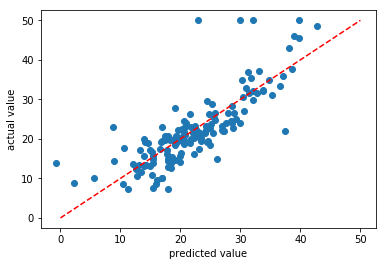

In [28]:
import matplotlib.pyplot as plt

#横軸を予測値、縦軸を実績値とする散布図をプロットする
fig,ax = plt.subplots()
ax.scatter(y_pred,y_test)

ax.plot((0,50),(0,50),linestyle="dashed",color="red")
ax.set_xlabel("predicted value")
ax.set_ylabel("actual value")
plt.show()

次元削除

    データが持っている情報をなるべく損ねることなく次元を削減してデータを圧縮する

主成分分析

    主成分分析(PCA)は高次元のデータに対して分散が大きくなる方向を探して、元の次元と同じかそれより低い次元にデータを変換する

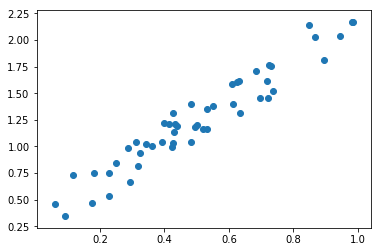

In [29]:
import numpy as np
import matplotlib.pyplot as plt
#シード値を固定
np.random.seed(123)

#0以上1未満の一様乱数を50個生成
X = np.random.random(size = 50)
#Xを2倍した後に、0以上1未満の一様乱数を0.5倍して足し合わせる
Y = 2 * X + 0.5 * np.random.rand(50)

#散布図をプロット
fig,ax = plt.subplots()
ax.scatter(X,Y)
plt.show()

In [30]:
from sklearn.decomposition import PCA
#主成分のクラスをインスタンス化
pca = PCA(n_components=2)

#主成分分析を実行
X_pca = pca.fit_transform(np.hstack((X[:,np.newaxis],Y[:,np.newaxis])))

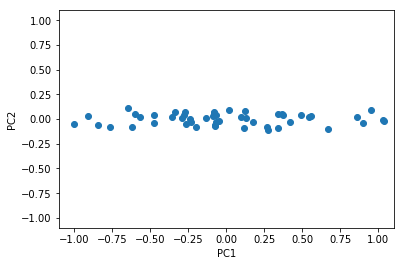

In [31]:
#主成分分析の結果から得られた座標を散布図にプロット
fig,ax = plt.subplots()
ax.scatter(X_pca[:,0],X_pca[:,1])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
plt.show()

モデルの評価

    ・分類の場合の代表な指標
    1.カテゴリの分類精度
    2.予測確率の正確さ
    

    カテゴリの分類精度
    どの程度当てられたかを定量化する指標として
    適合率(precision)、再現率(recall)、F値(F-Value)、正解率(accuracy)がある
    これらは混同行列から計算する
    
    適合率：正例と予測したデータのうち、実際位に正例の割合を示す
    　　　　適合率 = True Position / (True Position + False Position)
        　　予測を間違えないようにしたいときに重要
    再現率：実際の正例のうち、正例と予測したものの割合
    　　　　再現率 = True Position / (True Position + False Negative)
    F値：適合率と再現率の平均調和

In [35]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#irisデータセットを読み込む
iris = load_iris()
#先頭から100行まで
X,y = iris.data[:100,:],iris.target[:100]
#学習データセット、テストデータセットに分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=123)

#SVMのインスタンス化
svc = SVC()

#学習
svc.fit(X_train,y_train)
#予測
y_pred = svc.predict(X_test)

C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
from sklearn.metrics import classification_report
#適合率、再現率、F値を出力
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



交差検証(cross validation)

    データセットを学習用とテスト用に分割する処理を繰り返し、
    モデルの構築と評価を複数回行う処理

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
#サポートベクタマシンをインスタンス化
svc = SVC()

#10分割の交差検証を実行
#cvは分割数 scoring評価指標
cross_val_score(svc,X,y,cv=10,scoring="precision")

C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

予測確率の正確さ

    データに対する予測確率の正確さを定量化する指標
    ・ROC曲線(Receiver Operating Characteristic)
    ・AUC(Area Under the Curve)
    これらを用い、各データが正例に属する確率を計算し、確率の大きい順にデータを並べたときにその順序がどの程度正確であるかを定量化する

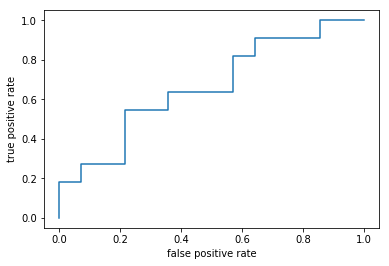

In [44]:
import numpy as np
import matplotlib.pyplot as plt
# 偽陽性率と真陽性率を算出
fpr = np.array([0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 4, 5, 5, 6, 7, 8, 8, 8, 9, 10, 11, 12, 12, 13, 14])/14
tpr = np.array([0, 1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7, 7, 7, 8, 9, 9, 10, 10, 10, 11, 11, 11])/11
# ROC曲線をプロット
fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

In [42]:
from sklearn.metrics import roc_curve
labels = np.array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])
probs = np.array([0.98, 0.95, 0.9, 0.87, 0.85, 
                  0.8, 0.75, 0.71, 0.63, 0.55, 
                  0.51, 0.47, 0.43, 0.38, 0.35, 
                  0.31, 0.28, 0.24, 0.22, 0.19, 
                  0.15, 0.12, 0.08, 0.004, 0.01])
# 偽陽性率、真陽性率、しきい値を算出
fpr, tpr, threshold = roc_curve(labels, probs)
print('偽陽性率: ', fpr)
print('真陽性率: ', tpr)

偽陽性率:  [0.         0.         0.         0.07142857 0.07142857 0.21428571
 0.21428571 0.35714286 0.35714286 0.57142857 0.57142857 0.71428571
 0.71428571 0.85714286 0.85714286 1.        ]
真陽性率:  [0.         0.09090909 0.18181818 0.18181818 0.27272727 0.27272727
 0.54545455 0.54545455 0.63636364 0.63636364 0.81818182 0.81818182
 0.90909091 0.90909091 1.         1.        ]


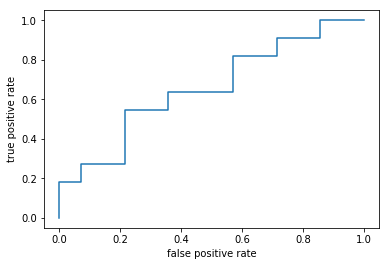

In [43]:
# ROC曲線をプロット
fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

AUCの値が1に近づくほど確率が相対的に高いサンプルが正例、相対的に低いサンプルが負例となる傾向がある

In [45]:
from sklearn.metrics import roc_auc_score
# AUCを算出
roc_auc_score(labels, probs)

0.6558441558441558

ハイパーパラメータの最適化

    ハイパーパラメータの最適化する方法
    ・グリッドサーチ(grid search)
    　ハイパーパラメータの候補を指定してそれぞれのハイパーパラメータで学習を行いテストデータセットに対する
     予測が最も良い値選択する方法
    ・ランダムサーチ(random search)

In [47]:

from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Irisデータセットをロード
iris = load_iris()
X, y = iris.data, iris.target
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# 決定木をインスタンス化
clf = DecisionTreeClassifier()
param_grid = {'max_depth': [3, 4, 5]}
# 10分割交差検証の実行
#param_gridに引数名と値のリストを対応付ける辞書を指定する
cv = GridSearchCV(clf, param_grid=param_grid, cv=10)
cv.fit(X_train, y_train)

C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [50]:
#最適な深さを確認する
cv.best_params_

{'max_depth': 5}

In [51]:
#最適なモデルの確認
cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
#最適なモデルを用いて予測をする
y_pred = cv.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])